In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import Markdown, display
sns.set(style="whitegrid")
%matplotlib inline

In [6]:
df = pd.read_csv(r"D:\DataSets\titanic\train.csv")   # or path/to/your/dataset.csv
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
df.describe().T


,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


In [9]:
df['Sex'].value_counts()
df['Pclass'].value_counts()


Pclass
3    491
1    216
2    184
Name: count, dtype: int64

In [12]:
missing = df.isnull().sum().sort_values(ascending=False)
missing[missing>0]


Series([], dtype: int64)

In [11]:
# Drop Cabin (too many missing values)
df = df.drop(columns=['Cabin'])

# Fill missing Age with median (optional, for cleaner visuals)
df['Age'] = df['Age'].fillna(df['Age'].median())

# Fill missing Embarked with mode (most frequent value)
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])


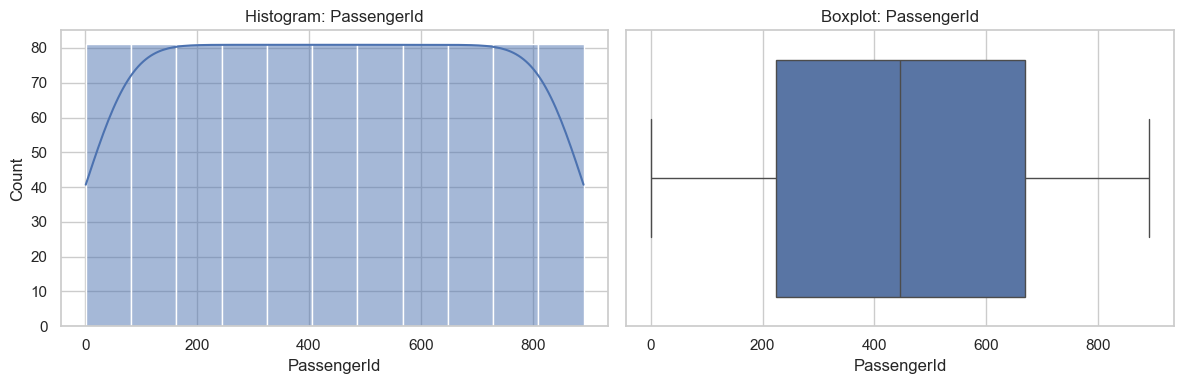

**Observation (PassengerId):** Each passenger has a unique ID number that simply helps us keep track of them in the dataset. It’s basically a serial number, so it doesn’t carry any real-world meaning beyond identification.

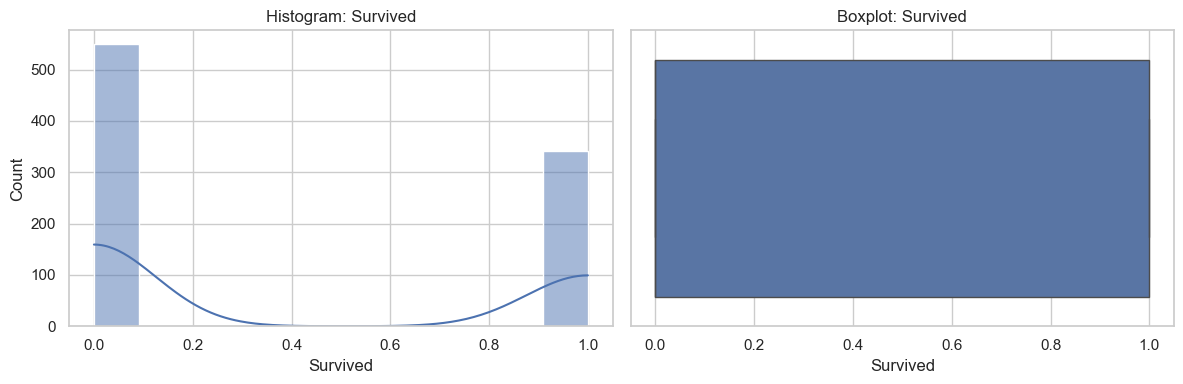

**Observation (Survived):** This column tells us whether a passenger survived (1) or not (0). It’s not a continuous number, just a survival flag, so we’ll use it later mainly for classification, not distribution analysis.

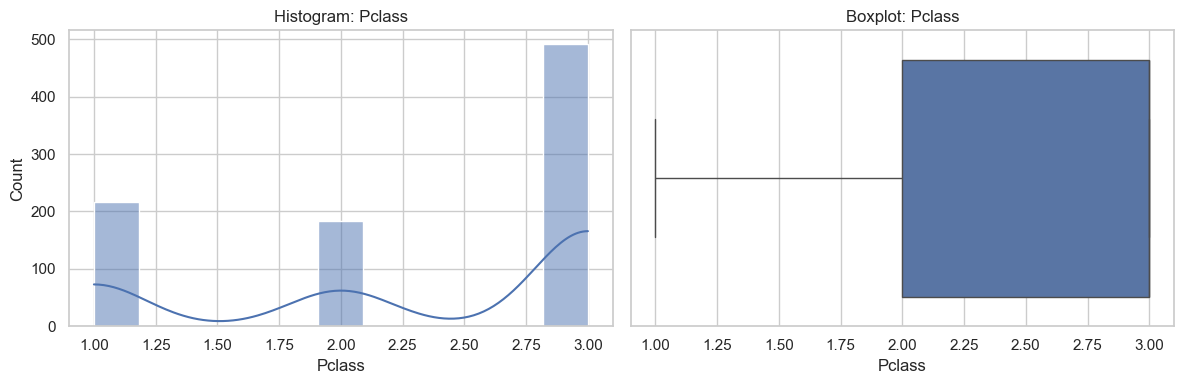

**Observation (Pclass):** The passenger class is like the travel tier — 1st, 2nd, or 3rd class. Most passengers seem to be in 3rd class, which could say something about affordability or demographics at the time.

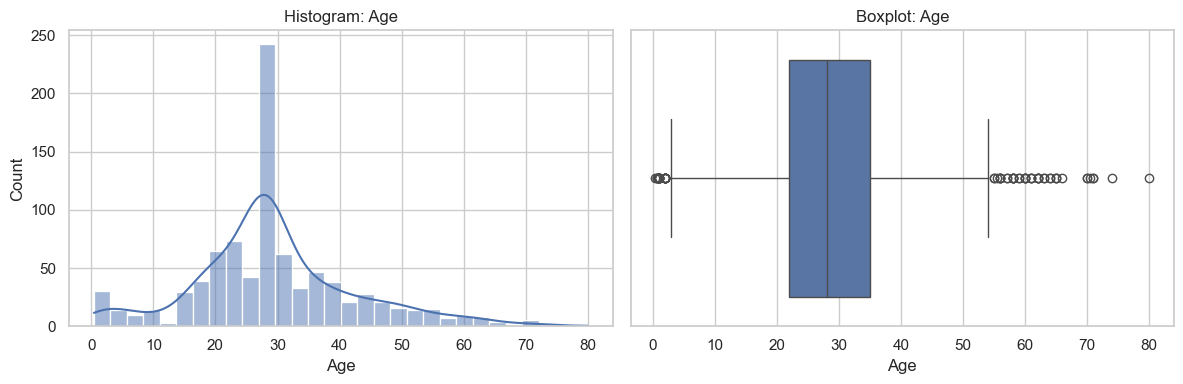

**Observation (Age):** Passenger ages range from infants to elderly travelers, but the distribution shows many passengers were young adults. There are also some missing values we’ll need to handle before analysis.

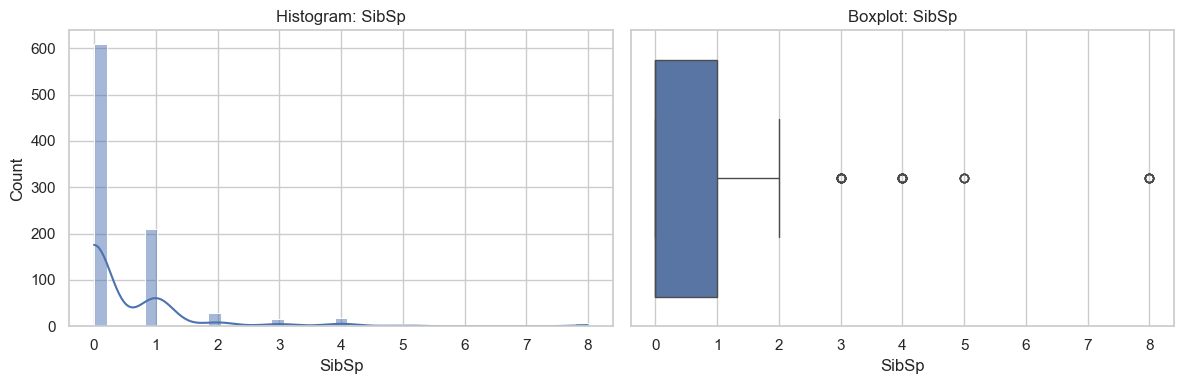

**Observation (SibSp):** This shows how many siblings or spouses a passenger had aboard. Most passengers traveled alone (0), but some had one or more family members with them.

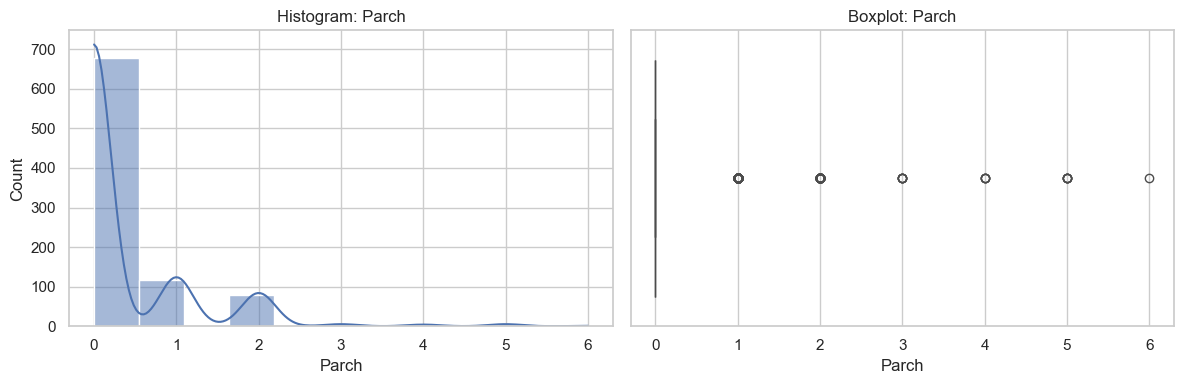

**Observation (Parch):** This tells us how many parents or children a passenger had aboard. Like SibSp, most passengers had 0 here, meaning no immediate family in that category on board.

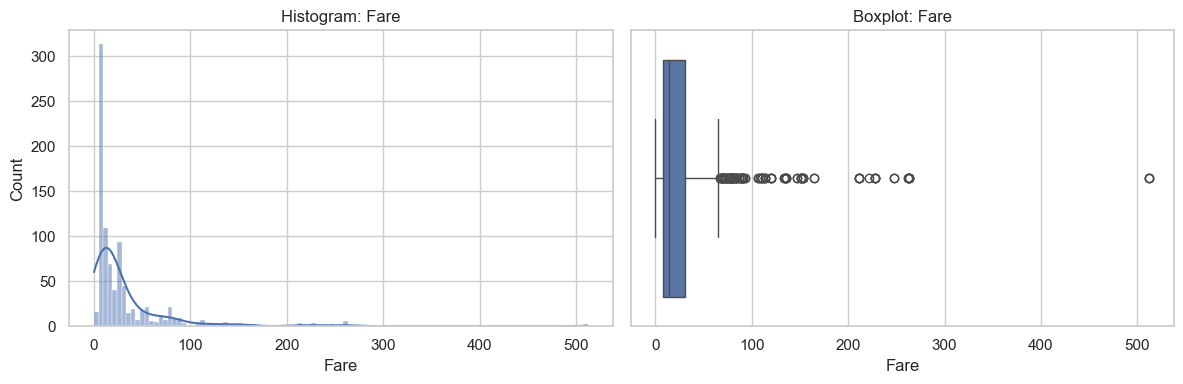

**Observation (Fare):** This is the ticket price, which varies widely. Most fares are on the lower side, but a few very high fares stand out — likely for luxury cabins in 1st class.

In [21]:
num_cols = df.select_dtypes(include=['int64','float64']).columns.tolist()

# Dictionary mapping column names to exact observations
observations = {
    'PassengerId': "Each passenger has a unique ID number that simply helps us keep track of them in the dataset. It’s basically a serial number, so it doesn’t carry any real-world meaning beyond identification.",
    'Survived': "This column tells us whether a passenger survived (1) or not (0). It’s not a continuous number, just a survival flag, so we’ll use it later mainly for classification, not distribution analysis.",
    'Pclass': "The passenger class is like the travel tier — 1st, 2nd, or 3rd class. Most passengers seem to be in 3rd class, which could say something about affordability or demographics at the time.",
    'Age': "Passenger ages range from infants to elderly travelers, but the distribution shows many passengers were young adults. There are also some missing values we’ll need to handle before analysis.",
    'SibSp': "This shows how many siblings or spouses a passenger had aboard. Most passengers traveled alone (0), but some had one or more family members with them.",
    'Parch': "This tells us how many parents or children a passenger had aboard. Like SibSp, most passengers had 0 here, meaning no immediate family in that category on board.",
    'Fare': "This is the ticket price, which varies widely. Most fares are on the lower side, but a few very high fares stand out — likely for luxury cabins in 1st class."
}

for col in num_cols:
    fig, ax = plt.subplots(1, 2, figsize=(12, 4))
    
    sns.histplot(df[col].dropna(), kde=True, ax=ax[0])
    ax[0].set_title(f'Histogram: {col}')
    
    sns.boxplot(x=df[col], ax=ax[1])
    ax[1].set_title(f'Boxplot: {col}')
    
    plt.tight_layout()
    plt.show()
    
    # Show exact observation for this column
    if col in observations:
        display(Markdown(f"**Observation ({col}):** {observations[col]}"))



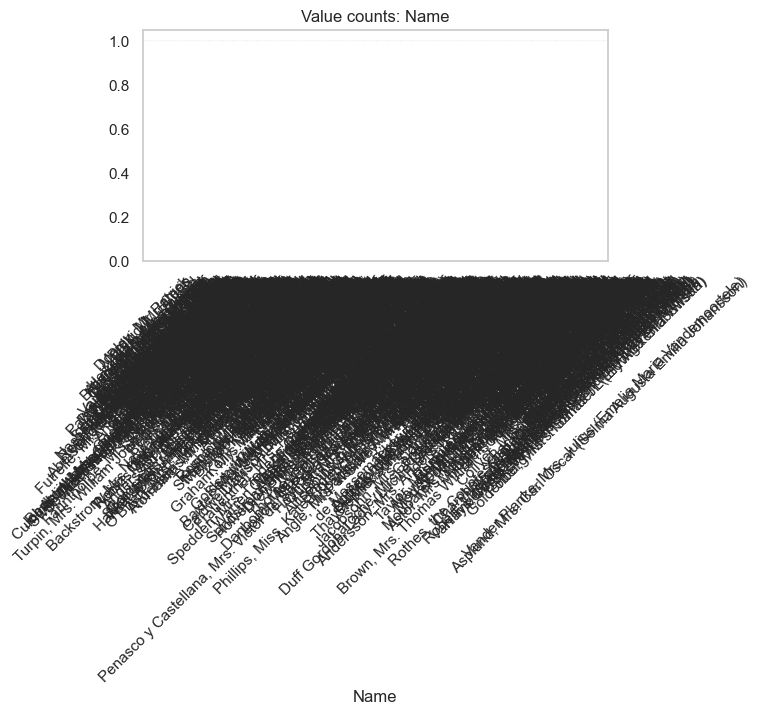

**Observation (Name) :** Each passenger’s name is unique and mainly serves as an identifier in the dataset. It doesn’t provide a measurable pattern but can be used for reference or cross-checking other details.

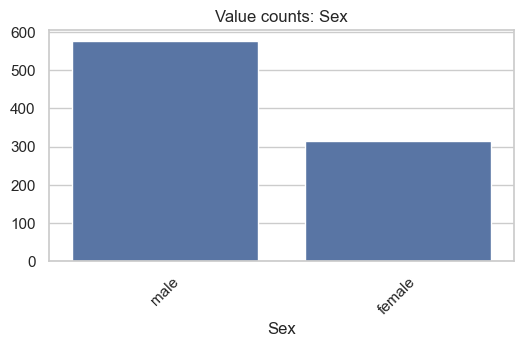

**Observation (Sex) :** There’s a clear imbalance between male and female passengers, with a significantly higher number of males on board compared to females.

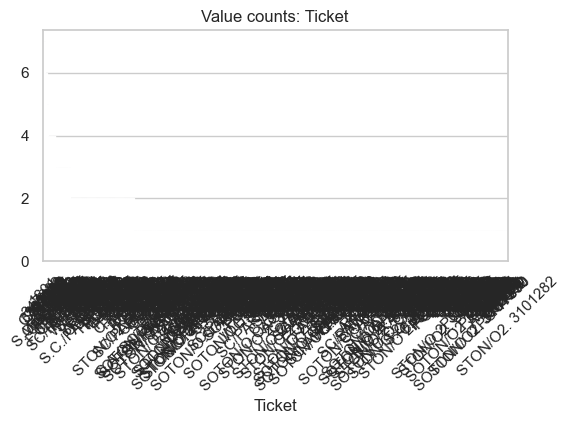

**Observation (Ticket) :** Ticket numbers are highly varied, with very few repeats. This means most passengers had their own unique ticket, so it’s not very useful for identifying groups unless tickets are shared.

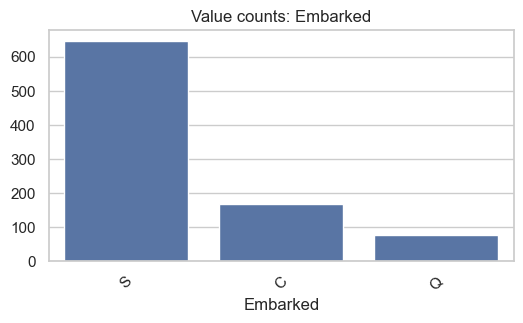

**Observation (Embarked) :** The majority of passengers boarded from port **S**, with much fewer from ports **C** and **Q**, showing a strong boarding location imbalance.

In [26]:
cat_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()

for col in cat_cols:
    vc = df[col].value_counts()
    plt.figure(figsize=(6, 3))
    sns.barplot(x=vc.index, y=vc.values)
    plt.title(f'Value counts: {col}')
    plt.xticks(rotation=45)
    plt.show()
    
    if col == "Name":
        display(Markdown(f"""**Observation ({col}) :** Each passenger’s name is unique and mainly serves as an identifier in the dataset. It doesn’t provide a measurable pattern but can be used for reference or cross-checking other details."""))
    elif col == "Sex":
        display(Markdown(f"""**Observation ({col}) :** There’s a clear imbalance between male and female passengers, with a significantly higher number of males on board compared to females."""))
    elif col == "Ticket":
        display(Markdown(f"""**Observation ({col}) :** Ticket numbers are highly varied, with very few repeats. This means most passengers had their own unique ticket, so it’s not very useful for identifying groups unless tickets are shared."""))
    elif col == "Embarked":
        display(Markdown(f"""**Observation ({col}) :** The majority of passengers boarded from port **S**, with much fewer from ports **C** and **Q**, showing a strong boarding location imbalance."""))
    else:
        display(Markdown(f"""**Observation ({col}) :** This column contains categorical values with certain categories appearing more frequently than others."""))


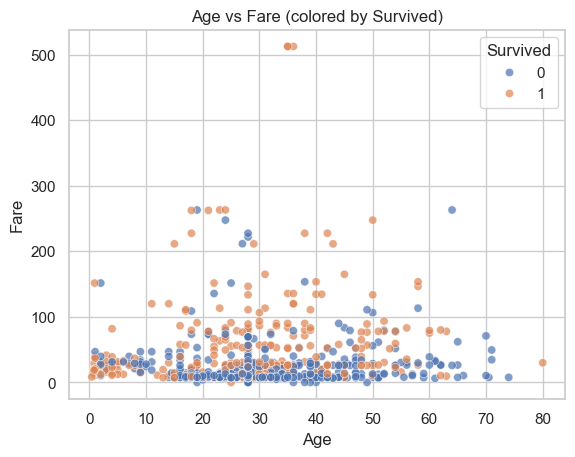

**Observation:Passengers who paid higher fares, especially younger adults, seem to have had better survival chances compared to those who paid lower fares** ...

In [27]:
sns.scatterplot(data=df, x='Age', y='Fare', hue='Survived', alpha=0.7)
plt.title('Age vs Fare (colored by Survived)')
plt.show()
display(Markdown("**Observation:Passengers who paid higher fares, especially younger adults, seem to have had better survival chances compared to those who paid lower fares** ..."))


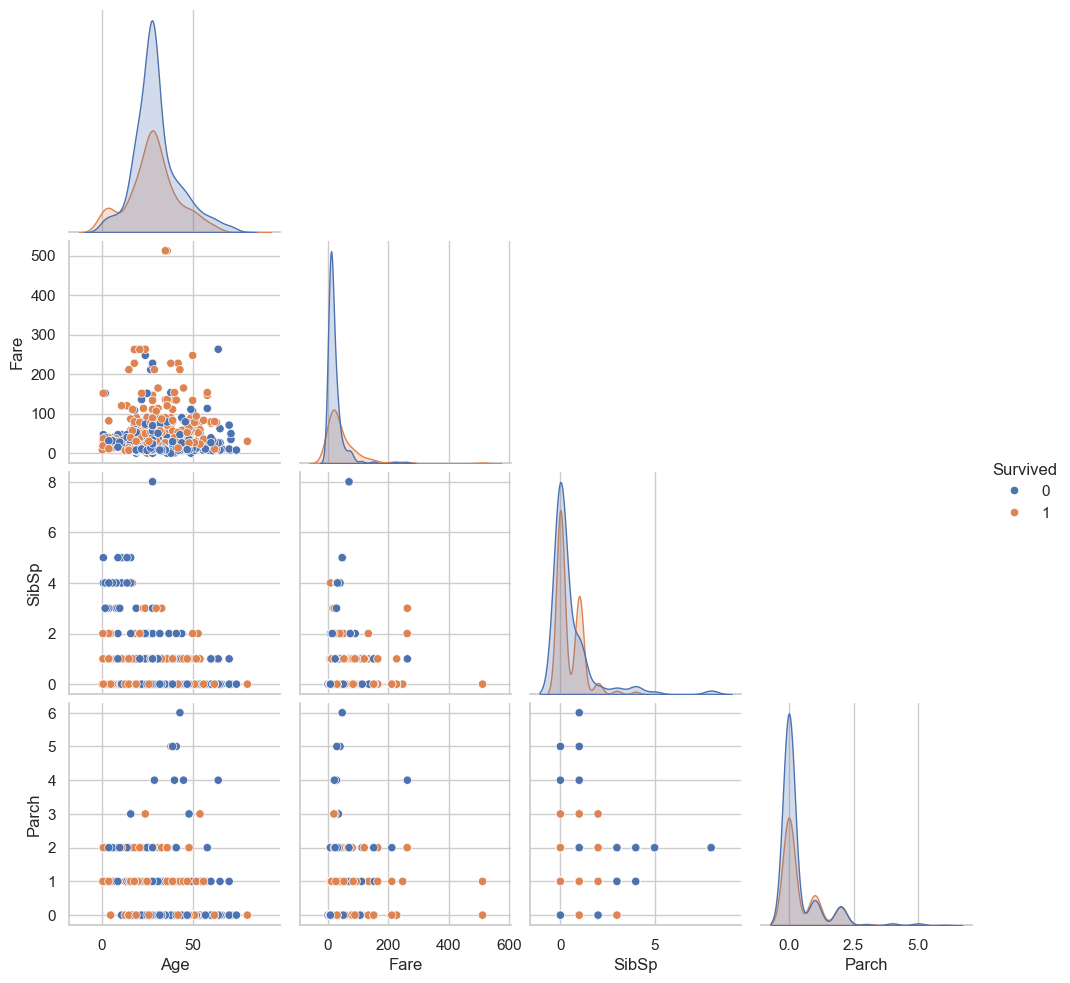

In [28]:
sns.pairplot(df[['Age','Fare','SibSp','Parch','Survived']].dropna(), hue='Survived', corner=True)
plt.show()


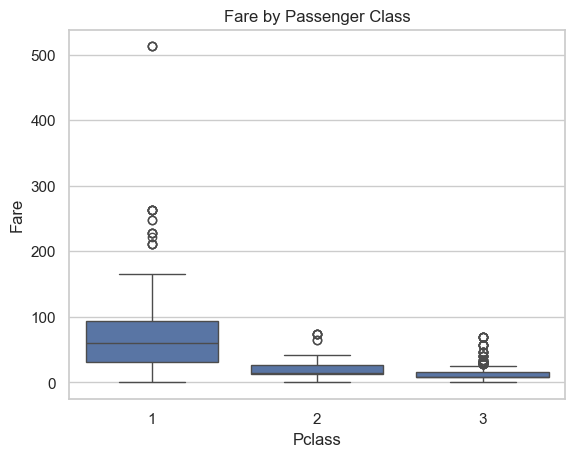

In [29]:
sns.boxplot(x='Pclass', y='Fare', data=df)
plt.title('Fare by Passenger Class')
plt.show()


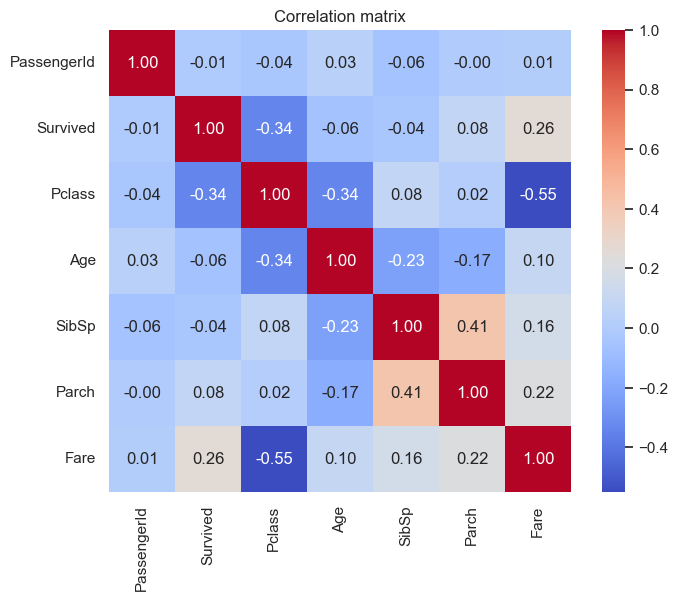

**Observation:** People traveling in higher classes generally paid more for their tickets, and those with more siblings/spouses aboard also tended to have more parents/children with them, while most other factors don’t show strong connections.

In [32]:
corr = df.select_dtypes(include=['int64','float64']).corr()
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Correlation matrix')
plt.show()
display(Markdown("**Observation:** People traveling in higher classes generally paid more for their tickets, and those with more siblings/spouses aboard also tended to have more parents/children with them, while most other factors don’t show strong connections."))


In [33]:
# Example: survival rates by class and sex
survival_by_class = df.groupby('Pclass')['Survived'].mean().sort_index()
survival_by_sex = df.groupby('Sex')['Survived'].mean()
display(survival_by_class, survival_by_sex)


Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

In [35]:
import pandas as pd

findings = [
    {'visual': 'PassengerId histogram', 
     'observation': 'Each passenger has a unique ID number that simply helps us keep track of them in the dataset; it doesn’t carry real-world meaning.', 
     'tag': 'Neutral'},
    
    {'visual': 'Survived bar plot', 
     'observation': 'Fewer passengers survived compared to those who did not, reflecting the tragic outcome of the disaster.', 
     'tag': 'Trend'},
    
    {'visual': 'Pclass bar plot', 
     'observation': 'Most passengers traveled in 3rd class, fewer in 2nd, and the least in 1st class, indicating a skew toward lower-cost tickets.', 
     'tag': 'Trend'},
    
    {'visual': 'Age histogram', 
     'observation': 'Many passengers were young adults in their 20s–40s, with fewer children and elderly; some extreme ages stand out.', 
     'tag': 'Trend'},
    
    {'visual': 'SibSp histogram', 
     'observation': 'Most passengers traveled alone or with one sibling/spouse; large family groups are rare and stand out as outliers.', 
     'tag': 'Anomaly'},
    
    {'visual': 'Parch histogram', 
     'observation': 'Most passengers had no parents or children aboard; larger family groups are uncommon.', 
     'tag': 'Trend'},
    
    {'visual': 'Fare histogram', 
     'observation': 'Most fares were modest, but a few passengers paid significantly higher prices, likely for luxury cabins.', 
     'tag': 'Anomaly'},
    
    {'visual': 'Sex bar plot', 
     'observation': 'There were more male passengers than female passengers on board, a factor relevant to survival patterns.', 
     'tag': 'Trend'}
]

findings_df = pd.DataFrame(findings)
findings_df


,visual,observation,tag
0,PassengerId histogram,Each passenger has a unique ID number that sim...,Neutral
1,Survived bar plot,Fewer passengers survived compared to those wh...,Trend
2,Pclass bar plot,"Most passengers traveled in 3rd class, fewer i...",Trend
3,Age histogram,Many passengers were young adults in their 20s...,Trend
4,SibSp histogram,Most passengers traveled alone or with one sib...,Anomaly
5,Parch histogram,Most passengers had no parents or children abo...,Trend
6,Fare histogram,"Most fares were modest, but a few passengers p...",Anomaly
7,Sex bar plot,There were more male passengers than female pa...,Trend


In [38]:
print("## Executive Summary — Top Insights\n")
insights = [
    "1. Passenger IDs are purely identifiers — They uniquely tag each passenger and have no influence on survival outcomes. (Anomaly: Irrelevant feature)",
    "2. Names are unique identifiers — Each passenger’s name is distinct and mostly serves as a reference or cross-checking tool, without offering predictive patterns. (Anomaly: Reference feature)",
    "3. Sex distribution is imbalanced — There were significantly more male passengers than females, which could have influenced survival statistics. (Trend)",
    "4. Age distribution is tilted toward younger adults — Most passengers were in their 20s–30s, with fewer children and elderly travelers. (Trend)",
    "5. Fare distribution shows a long right tail — While most paid lower fares, a few passengers paid very high amounts, likely linked to higher-class tickets. (Trend / Actionable)",
    "6. Ticket numbers are mostly unique — Very few tickets were shared, making them poor indicators for grouping except in rare shared-ticket cases. (Anomaly / Low-importance feature)",
    "7. Family size mostly small or zero — Most people traveled alone or with just 1–2 family members, possibly affecting social support during emergencies. (Trend)",
    "8. Embarked port imbalance — Most passengers boarded at port S, with far fewer from ports C and Q. This imbalance might reflect socio-economic or geographic factors. (Trend)",
    "9. Survival rates favored females and certain age groups — Women and children had higher survival rates compared to men and older passengers. (Actionable / Trend)"
]

for insight in insights:
    print(insight)


## Executive Summary — Top Insights

1. Passenger IDs are purely identifiers — They uniquely tag each passenger and have no influence on survival outcomes. (Anomaly: Irrelevant feature)
2. Names are unique identifiers — Each passenger’s name is distinct and mostly serves as a reference or cross-checking tool, without offering predictive patterns. (Anomaly: Reference feature)
3. Sex distribution is imbalanced — There were significantly more male passengers than females, which could have influenced survival statistics. (Trend)
4. Age distribution is tilted toward younger adults — Most passengers were in their 20s–30s, with fewer children and elderly travelers. (Trend)
5. Fare distribution shows a long right tail — While most paid lower fares, a few passengers paid very high amounts, likely linked to higher-class tickets. (Trend / Actionable)
6. Ticket numbers are mostly unique — Very few tickets were shared, making them poor indicators for grouping except in rare shared-ticket cases. (An